# 베스트 모델 찾기 - 와인 이진분류

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed=2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
wine = pd.read_csv('dataset/wine.csv', header=None)
wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(wine.iloc[:,:-1].values)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, wine.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

## 모델 정의/설정

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),               
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'],
     )


## 모델 저장관련 설정

In [10]:
modelpath = 'model/best_wine_{epoch:03d}_{val_loss:.4f}.h5'

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    modelpath, monitor='val_loss', verbose=1, save_best_only=True
)

## 모델 학습 및 저장

In [12]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200, batch_size=200, verbose=0,
    callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.64002, saving model to model\best_wine_001_0.6400.h5

Epoch 00002: val_loss improved from 0.64002 to 0.58731, saving model to model\best_wine_002_0.5873.h5

Epoch 00003: val_loss improved from 0.58731 to 0.53009, saving model to model\best_wine_003_0.5301.h5

Epoch 00004: val_loss improved from 0.53009 to 0.47145, saving model to model\best_wine_004_0.4715.h5

Epoch 00005: val_loss improved from 0.47145 to 0.41201, saving model to model\best_wine_005_0.4120.h5

Epoch 00006: val_loss improved from 0.41201 to 0.34860, saving model to model\best_wine_006_0.3486.h5

Epoch 00007: val_loss improved from 0.34860 to 0.29236, saving model to model\best_wine_007_0.2924.h5

Epoch 00008: val_loss improved from 0.29236 to 0.23457, saving model to model\best_wine_008_0.2346.h5

Epoch 00009: val_loss improved from 0.23457 to 0.17852, saving model to model\best_wine_009_0.1785.h5

Epoch 00010: val_loss improved from 0.17852 to 0.13641, saving model to mode

## 평가는 베스트 모델로 해야 함

In [14]:
from tensorflow.keras.models import load_model
best_model = load_model('model/best_wine_200_0.0187.h5')

In [15]:
best_model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 530us/step - loss: 0.0302 - accuracy: 0.9926


[0.03024398162961006, 0.9926154017448425]

## 훈련과정 시각화

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

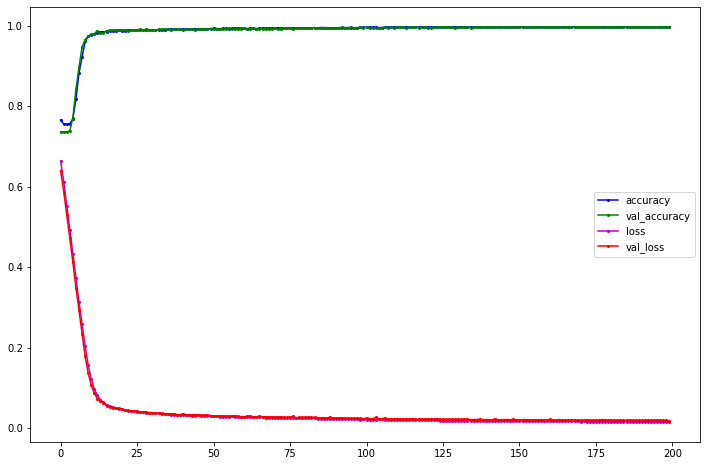

In [21]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vacc, 'go-', markersize=2, label='val_accuracy')
plt.plot(x_len, y_loss, 'mo-', markersize=2, label='loss')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()